<a href="https://colab.research.google.com/github/kartikdatascience/analytics_projects/blob/main/Online_Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Importing important librabries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/sample_data/Online Retail.xlsx")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

##**Data Cleaning: Handle missing values**

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df[df["StockCode"]==22139].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [ ]:
most_freq = df[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,20713,wrongly marked. 23343 in box,1
4788,20725,LUNCH BAG RED SPOTTY,1
4789,20748,Found,1
4790,85204,lost??,1


In [ ]:
most_freq[most_freq["StockCode"]=="85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
most_freq.groupby("StockCode").head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4764,90184c,BLACK CHUNKY BEAD BRACELET W STRAP,1
4766,37330,BIG POLKADOT MUG,1
4777,85224,ASSORTED COLOUR SILK GLASSES CASE,1
4778,90020,FILIGREE DIAMANTE CHAIN,1


In [ ]:
most_freq.columns = ["StockCode","freq_Description","count"]
df2 = df.merge(most_freq, on="StockCode", how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [ ]:
df2["Description"]=df2["freq_Description"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [ ]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171188
Country,0
freq_Description,112
count,112


In [ ]:
df2.dropna(subset = 'Description', inplace=True)
df2.isnull().sum()

# We have managed to handle the description column and now there are no null values in Description column

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171076
Country,0
freq_Description,0
count,0


In [ ]:
# Dropping the columns not required for further processing

df2.drop(columns=['freq_Description','count'], inplace = True)


In [ ]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
711026,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
711027,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
711028,581587,23254,KIDS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
711029,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,710919.000000,710919,710919.000000,539843.000000
mean,9.718405,2011-07-05 11:53:55.375253248,4.410160,15290.162562
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-29 15:12:00,1.250000,13956.000000
50%,3.000000,2011-07-20 16:17:00,2.100000,15152.000000
75%,10.000000,2011-10-19 10:31:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,194.114446,NaN,84.525607,1709.392583


From the above description we can see that Quantity and Unitprice are negative which is practically not possible. So, we will try to handle it.



In [ ]:
df2[df2['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
391449,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
391450,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
# We will considering only those quantity and unitprice values those are positive

df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,693945.000000,693945,693945.000000,527365.000000
mean,10.873889,2011-07-05 15:59:13.143203328,3.874301,15296.797165
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-29 15:20:00,1.250000,13969.000000
50%,4.000000,2011-07-21 10:44:00,2.100000,15159.000000
75%,12.000000,2011-10-19 11:49:00,4.130000,16794.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,137.669424,NaN,31.507544,1708.785281


In [ ]:
df3.Quantity.quantile(.99)

# This actually means that 99.99% of the times order qunatity are less then 100

100.0

In [ ]:
df3[df3.Quantity>1500]

# So, basically all the orders looks legit and we will not remove the outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6336,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
6472,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
33829,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
42702,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
68298,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
672274,579498,23084,allocate stock for dotcom orders ta,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672275,579498,23084,for online retail orders,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672276,579498,23084,temp adjustment,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672277,579498,23084,website fixed,2040,2011-11-29 15:52:00,1.79,12798.0,Japan


##**Feature Engineering: Creating new columns**

In [ ]:
df4 = df3.copy()
df4['TotalSales'] = df4['Quantity'] * df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
417580,564861,POST,POSTAGE,1,2011-08-31 10:21:00,15.00,17315.0,United Kingdom,15.00,8
76684,541282,23231,WRAP DOILEY DESIGN,25,2011-01-17 12:31:00,0.42,17690.0,United Kingdom,10.50,1
270954,555159,22487,WHITE WOOD GARDEN PLANT LADDER,1,2011-06-01 09:06:00,9.95,15124.0,United Kingdom,9.95,6
546295,572550,23302,KNEELING MAT HOUSEWORK DESIGN,1,2011-10-24 17:06:00,3.29,NaN,United Kingdom,3.29,10
589872,575060,22593,CHRISTMAS GINGHAM STAR,12,2011-11-08 12:29:00,0.85,13089.0,United Kingdom,10.20,11


##**Visualization & EDA**

###1. Plot monthly sales

In [ ]:
monthly_sales = df4.groupby("Month")["TotalSales"].sum()

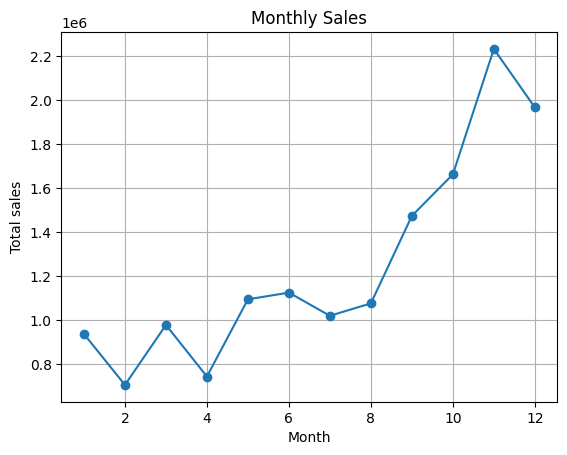

In [ ]:
monthly_sales.plot(kind="line", title="Monthly Sales", marker='o')
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.grid()
plt.show()

**Insights**

Total monthly sales has started to rise from the month of August and peak sales is in November. Is is likely due to holiday or festive season.

###2. Top 5 countries by total sales

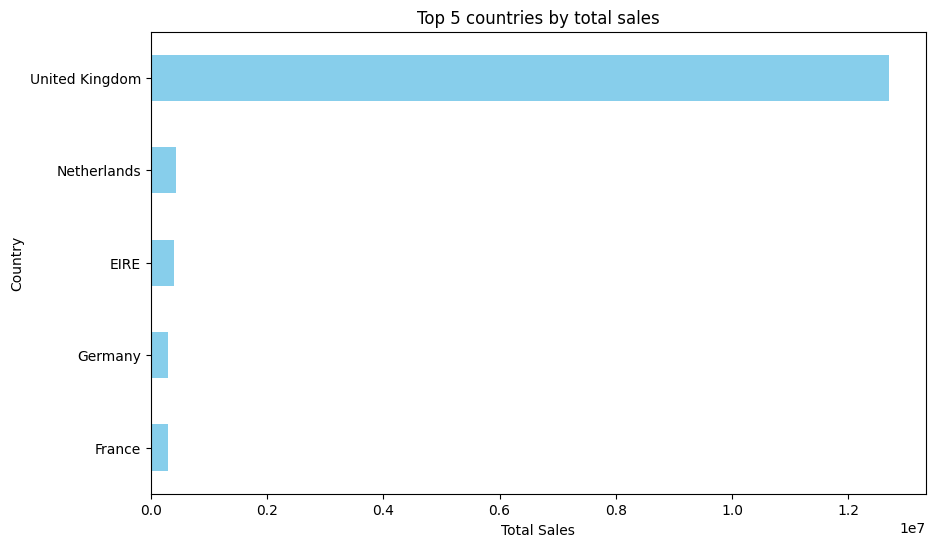

In [ ]:
top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))  # Adjusting figure size for better visualization
top_5_countries.plot(kind='barh', color='skyblue', title='Top 5 countries by total sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis for horizontal bar chart
plt.show()



In [ ]:
top_5_countries

,TotalSales
Country,
United Kingdom,1.269449e+07
Netherlands,4.316229e+05
EIRE,3.937788e+05
Germany,3.051400e+05
France,3.028098e+05


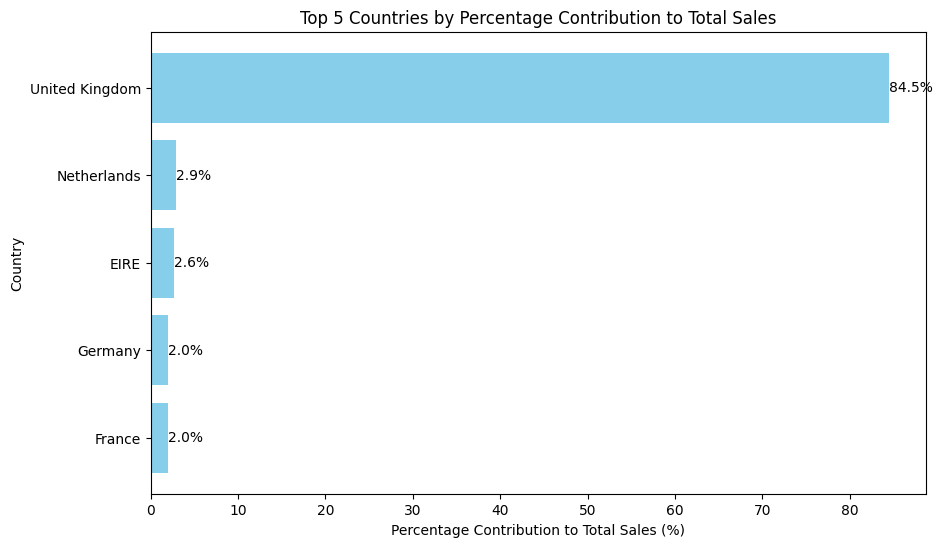

In [ ]:

country_wise_sales = df4.groupby('Country')['TotalSales'].sum()
total_sales = country_wise_sales.sum()



percentage_contributions = (top_5_countries / total_sales) * 100

# Create the bar plot with percentage labels
plt.figure(figsize=(10, 6))
bars = plt.barh(percentage_contributions.index, percentage_contributions.values, color='skyblue')
plt.xlabel('Percentage Contribution to Total Sales (%)')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.gca().invert_yaxis()

# Add percentage labels on the bars
for bar, percentage in zip(bars, percentage_contributions):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%',
             va='center', ha='left', color='black')

plt.show()


**Insights**

United Kingdom is contributing about 84.5% of the total sales.
So, maybe we should focus on more diversification, and also target other countries for sales, as our sales should not suffer if there is some ups and downs in the UK market.

###3. Product wise sales

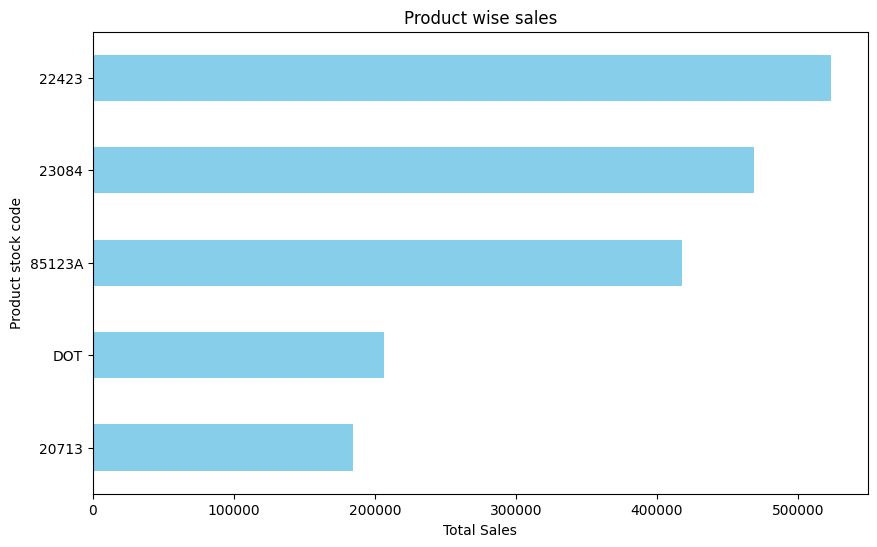

In [ ]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))  # Adjusting figure size for better visualization
product_wise_sales.plot(kind='barh', color='skyblue', title='Product wise sales')
plt.xlabel('Total Sales')
plt.ylabel('Product stock code')
plt.gca().invert_yaxis()  # Invert y-axis for horizontal bar chart
plt.show()

**Insights**: From this visualization we get to see that top two products in terms of sales are "22423" & "23084"